# Book Recommendation System

Datasets:https://www.kaggle.com/arashnic/book-recommendation-dataset?select=Users.csv

## Need of Data Preprocessing in Machine Learning

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues. Data preprocessing prepares raw data for further processing.
Why preprocessing?

Real-world data are generally:

•	Incomplete: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data

•	Noisy: containing errors or outliers

•	Inconsistent: containing discrepancies in codes or names


## Tasks in data preprocessing:

•   1- Data integration: using multiple databases, data cubes, or files.	

•	2- Data cleaning: fill in missing values, smooth noisy data, identify or remove outliers, and resolve inconsistencies.

•	3-Data transformation: normalization and aggregation.

•	4- Data reduction: reducing the volume but producing the same or similar analytical results.

•	5- Data discretization: part of data reduction, replacing numerical attributes with nominal ones.

<img src="Data-Preprocessing.jpg">
https://machinelearningknowledge.ai/data-preprocessing-in-machine-learning/

### 1. Understanding the Problem
The Book-Crossing dataset comprises 3 files.

•	Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

•	Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

•	Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

The goal of this project is to predict rating for books and recommend the ralated books to users.


### 2- Understanding the Data
 
What is Exploratory data analysis?

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
To begin this exploratory analysis, first import libraries and define functions for plotting the data using matplotlib, .....


#### 2-1- Import crucial libraries, public functions and load data

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Function to plot distribution
def plot_distribution(feature, data):
    sns.displot(x=feature, data=data, kde=True, color='#244747');
    plt.figtext(0.2, 1, '%s Distribution'%feature, fontfamily='serif', fontsize=17, fontweight='bold');

In [3]:
#Function to box plot
def plot_box(feature, data):
    sns.boxplot(x=feature, data=data,showmeans=True, medianprops={'color':'red'});
    plt.figtext(0.2, 1, '%s Find outlier data in' %feature, fontfamily='serif', fontsize=17, fontweight='bold');
 

In [4]:
ratings = pd.read_csv('datasets/ratings.csv')

In [5]:
books = pd.read_csv('datasets/Books.csv',low_memory=False)

In [6]:
users = pd.read_csv('datasets/Users.csv')

#### 2.2- Identifying the types of features

In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
books.info()
#Image-URL-L has a few null value.
#Book-Author has a few null value.
#Publisher has a few null value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [11]:
users.info()
#Age has many null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [13]:
ratings['Book-Rating'].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

#### 2-3- Integrate datasets

In [14]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [15]:
df1 = pd.merge(books, ratings, on='ISBN')
print(f'Books and ratings data combined: {len(df1)} rows')
df1 = pd.merge(df1, users, on='User-ID')

Books and ratings data combined: 1031136 rows


In [16]:
#change column name of books dataset
df1.columns = ['BookID', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher','UserID', 'BookRating','Location','Age']

In [17]:
df1.head()

,BookID,BookTitle,BookAuthor,YearOfPublication,Publisher,UserID,BookRating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,"timmins, ontario, canada",NaN


In [18]:
#Make copy from main datasets
df=df1.copy()

#### 2-4-Univariate Analysis

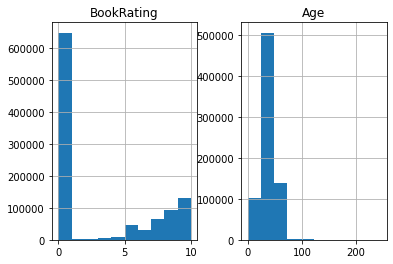

In [19]:
df[['BookRating','Age']].hist()
plt.show()

In [20]:
print(sorted(df['Age'].unique()))
#There are some nan,0 and some outliers

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 18.0, nan, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 89.0, 90.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 103.0, 104.0, 105.0, 107.0, 108.0, 109.0, 114.0, 116.0, 118.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 138.0, 140.0, 141.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 168.0, 199.0, 200.0, 201.0, 204.0, 209.0, 212.0, 219.0, 220.0, 223.0, 226.0, 228.0, 229.0, 237.0, 239.0, 244.0]


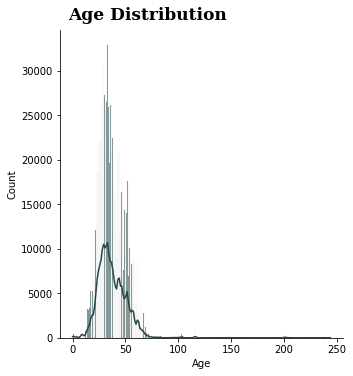

In [21]:
plot_distribution('Age', df)
# There are many outliers

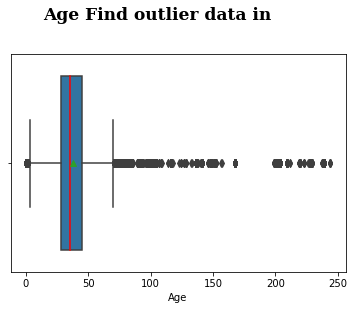

In [22]:
plot_box('Age', df)
#red: meadian
#green:mean
# There are many outliers

In [23]:
print(sorted(df['YearOfPublication'].unique()))
# there are 2 incorrect values (DK Publishing Inc and Gallimard) in this feature

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [24]:
df.iloc[0]
#we need just usa:Country name. so add new feature(country) and split Loation feature

BookID                              0195153448
BookTitle                  Classical Mythology
BookAuthor                  Mark P. O. Morford
YearOfPublication                         2002
Publisher              Oxford University Press
UserID                                       2
BookRating                                   0
Location             stockton, california, usa
Age                                       18.0
Name: 0, dtype: object

In [25]:
print(sorted(df['Location'].unique()))
#It has a lot of useless values

['&#304;stanbul, n/a, turkey', '&#321;ód&#378;, &#322;ódzkie, poland', '&#321;ód&#378;, n/a, poland', '&#321;ód&#380;, &#322;ódzkie, poland', '&#36149;&#28207;, &#24191;&#35199;, china', '***********, illinois, usa', '*, virginia, usa', ', ,', ', , belize', ', , canada', ', , germany', ', , luxembourg', ', , norway', ', , singapore', ', , the great white north', ', , usa', ', herts, united kingdom', ', illinois, usa', ', massachusetts, usa', ', new hampshire, usa', ', ontario, canada', ', pas de calais, france', ', usa,', '-, british columbia, canada', '-, england, united kingdom', '-, ile de france, france', '-, n/a, ireland', '-, north yorkshire, united kingdom', '-, st andrew`s, guernsey, channel islands', '-, upper austria, austria', '-, wales, united kingdom', '-, westland, new zealand', '--, n/a, spain', '-----, virginia, usa', '---------, dc, usa', '., ., switzerland', '., kansas, usa', '.., scotland, united kingdom', '..., ..., germany', '..., new york, usa', '.................

In [26]:
print(sorted(df['BookRating'].unique()))
#[0]:implicit rating
#[1-10]:explicit rting

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


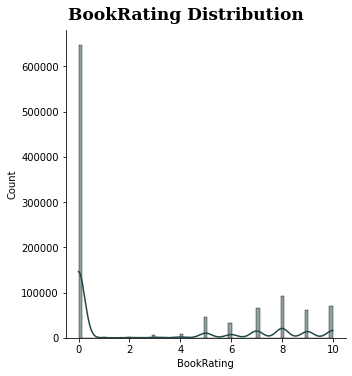

In [27]:
plot_distribution('BookRating', df)
# There are many outliers

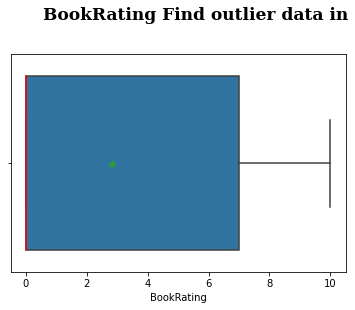

In [28]:
plot_box('BookRating', df)
#red: meadian
#green:mean

In [29]:
df['Publisher'].head()
# We should change &amp to &

0       Oxford University Press
1         HarperFlamingo Canada
2               HarperPerennial
3          Farrar Straus Giroux
4    W. W. Norton &amp; Company
Name: Publisher, dtype: object

##### 2-5-Multivariate Analysis

In [30]:
from pandas.plotting import scatter_matrix

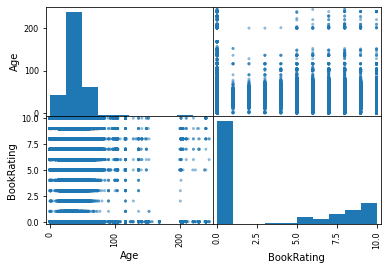

In [31]:
scatter_matrix(df[['Age','BookRating']])
plt.show()
#There is not any relation

<AxesSubplot:title={'center':'Correlation Heatmap'}>

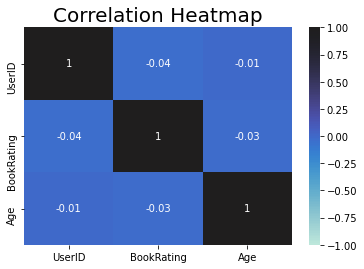

In [32]:
corr_df = df.corr().round(2) 

plt.title('Correlation Heatmap', size=20)
sns.heatmap(corr_df,vmin=-1, vmax=1,annot=True,center=True)
#Maybe there isn't any correlation between numerical features.

#### 2.6- Exploring percentage of Missing value

In [33]:
df.isnull().sum().sort_values(ascending=False)

Age                  277835
Publisher                 2
BookAuthor                1
BookID                    0
BookTitle                 0
YearOfPublication         0
UserID                    0
BookRating                0
Location                  0
dtype: int64

In [34]:
def variable_missing_percentage(df, save_results=False):

    percentage_missing = df.isnull().mean().sort_values(ascending=False) * 100
    percentage_missing = percentage_missing.loc[percentage_missing > 0].round(2)
    missing_variables = len(percentage_missing)
    
    if len(percentage_missing) > 0:
        print(f'There are a total of {missing_variables} variables with missing values. Percentage of total missing:')
        print("\nFeature Name: Percentage of missing value:\n")
        print(percentage_missing)
    
    else:
        print('The dataframe has no missing values in any column.')
    
    if save_results:
        return percentage_missing

In [35]:
variable_missing_percentage(df)
#Drop variables with more than 80-90% missing data

There are a total of 3 variables with missing values. Percentage of total missing:

Feature Name: Percentage of missing value:

Age           26.94
Publisher      0.00
BookAuthor     0.00
dtype: float64


In [36]:
#Missing value of train dataset
df_missing=df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

<AxesSubplot:>

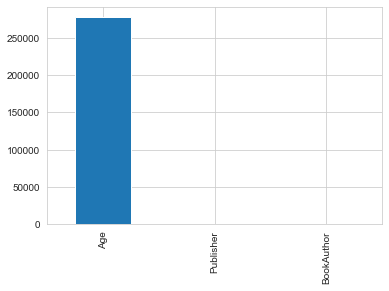

In [37]:
sns.set_style("whitegrid")
df_missing.plot.bar()

#### 3- Data preparation and preprocessing

#### 3-1-Handling the missing values and outliers

##### 3-1-1 Age feature

In [38]:
#Dealing with missing value and outliers
df.loc[(df.Age > 90) | (df.Age < 5),'Age'] = np.NAN

In [39]:
df.Age.fillna(round(df.Age.median()), inplace=True)

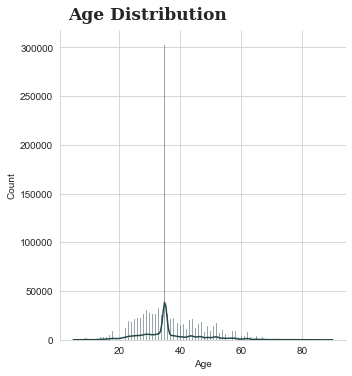

In [40]:
plot_distribution('Age', df)

In [41]:
df.isnull().sum().sort_values(ascending=False)

Publisher            2
BookAuthor           1
BookID               0
BookTitle            0
YearOfPublication    0
UserID               0
BookRating           0
Location             0
Age                  0
dtype: int64

In [42]:
#Convert float to int
df.Age = df.Age.astype(np.int32)

In [43]:
print(sorted(df['Age'].unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90]


In [44]:
df['Age_group'] = pd.cut(df['Age'], bins=[1, 6, 10, 15, 20, 35, 55, 99],
                             labels=['preschool', 'primary_school',
                                     'secondary_school', 'teenager', 'young_adult',
                                    'adult', 'senior'])

##### 3-1-2- Location feature

In [45]:
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())

In [46]:
print(sorted(df['Country'].unique()))

['', '"', '\\"n/a\\""', 'afghanistan', 'alachua', 'albania', 'alderney', 'algeria', 'america', 'andorra', 'angola', 'antarctica', 'antigua and barbuda', 'argentina', 'argentina"', 'aroostook', 'aruba', 'australia', 'austria', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belgium', 'belgium"', 'belize', 'benin', 'berguedà', 'bermuda', 'bolivia', 'bosnia and herzegovina', 'brazil', 'brunei', 'bulgaria', 'burkina faso', 'burlington', 'burma', 'c', 'c.a.', 'cambodia', 'camden', 'cameroon', 'canada', 'cananda', 'cape verde', 'caribbean sea', 'catalonia', 'catalunya', 'catalunya spain', 'cayman islands', 'channel islands', 'cherokee', 'chile', 'china', 'china"', 'collin', 'colombia', 'costa rica', 'croatia', 'croatia"', 'csa', 'cuba', 'cyprus', 'czech republic', 'denmark', 'denmark"', 'deutschland', 'disgruntled states of america', 'dominican republic', 'ecuador', 'ee.uu', 'egypt', 'el salvador', 'england', 'españa', 'estonia', 'ethiopia', 'euskal herria', 'everywhere and anywhere', 'far 

In [47]:
countries = df['Country'].value_counts()
countries

usa               746466
canada             93000
united kingdom     33072
germany            27657
                   24259
                   ...  
belgium"               1
tdzimi                 1
algeria                1
urugua                 1
we`re global!          1
Name: Country, Length: 288, dtype: int64

In [48]:
countries = set(countries[countries >= 10].index)
countries
# There are some punctuations and duplicate data in country name

{'',
 'albania',
 'andorra',
 'antarctica',
 'argentina',
 'aruba',
 'australia',
 'austria',
 'bahamas',
 'bahrain',
 'belgium',
 'belize',
 'bermuda',
 'brazil',
 'bulgaria',
 'burma',
 'canada',
 'catalonia',
 'catalunya',
 'cayman islands',
 'channel islands',
 'chile',
 'china',
 'colombia',
 'costa rica',
 'croatia',
 'cuba',
 'cyprus',
 'czech republic',
 'denmark',
 'deutschland',
 'dominican republic',
 'egypt',
 'england',
 'españa',
 'euskal herria',
 'everywhere and anywhere',
 'far away...',
 'finland',
 'framingham',
 'france',
 'germany',
 'greece',
 'guernsey',
 'haiti',
 'honduras',
 'hong kong',
 'hungary',
 'iceland',
 'india',
 'indonesia',
 'iran',
 'iraq',
 'ireland',
 'israel',
 'italia',
 'italy',
 'japan',
 'kazakhstan',
 'kenya',
 'kuwait',
 'laos',
 'lithuania',
 'luxembourg',
 'madagascar',
 'malaysia',
 'malta',
 'mexico',
 'moldova',
 'n/a',
 'n/a - on the road',
 'netherlands',
 'new zealand',
 'norway',
 'nz',
 'pakistan',
 'panama',
 'papua new guinea',

In [49]:
import string
df['Country'] = df['Country'].apply(lambda x: x if x in countries else 'other')
df['Country'] = df['Country'].fillna('other')
# Remove punctuation
df['Country'] = df['Country'].apply(
        lambda x: x.translate(str.maketrans('', '', string.punctuation))
    )
df['Country'] = df['Country'].replace(' na', 'other').replace('na', 'other').replace('', 'other')

In [50]:
print(sorted(df['Country'].unique()))

['albania', 'andorra', 'antarctica', 'argentina', 'aruba', 'australia', 'austria', 'bahamas', 'bahrain', 'belgium', 'belize', 'bermuda', 'brazil', 'bulgaria', 'burma', 'canada', 'catalonia', 'catalunya', 'cayman islands', 'channel islands', 'chile', 'china', 'colombia', 'costa rica', 'croatia', 'cuba', 'cyprus', 'czech republic', 'denmark', 'deutschland', 'dominican republic', 'egypt', 'england', 'españa', 'euskal herria', 'everywhere and anywhere', 'far away', 'finland', 'framingham', 'france', 'germany', 'greece', 'guernsey', 'haiti', 'honduras', 'hong kong', 'hungary', 'iceland', 'india', 'indonesia', 'iran', 'iraq', 'ireland', 'israel', 'italia', 'italy', 'japan', 'kazakhstan', 'kenya', 'kuwait', 'laos', 'lithuania', 'luxembourg', 'madagascar', 'malaysia', 'malta', 'mexico', 'moldova', 'na  on the road', 'netherlands', 'new zealand', 'norway', 'nz', 'other', 'pakistan', 'panama', 'papua new guinea', 'peru', 'philippines', 'phillipines', 'poland', 'portugal', 'qatar', 'romania', 'ru

In [51]:
df.drop(['Location'],axis=1,inplace=True)

##### 3-1-3- yearOfPublication feature

In [52]:
df.loc[df.YearOfPublication == 'DK Publishing Inc',:]

,BookID,BookTitle,BookAuthor,YearOfPublication,Publisher,UserID,BookRating,Age,Age_group,Country
352361,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,227771,7,19,teenager,israel
467962,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,130571,0,35,young_adult,usa
469216,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,169663,0,35,young_adult,usa


In [53]:
#investigating the rows having 'Gallimard' as yearOfPublication
df.loc[df.YearOfPublication == 'Gallimard',:]

,BookID,BookTitle,BookAuthor,YearOfPublication,Publisher,UserID,BookRating,Age,Age_group,Country
287500,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,137190,0,31,young_adult,france


In [54]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#BookID '0789466953'
df.loc[df.BookID == '0789466953','YearOfPublication'] = 2000
df.loc[df.BookID == '0789466953','BookAuthor'] = "James Buckley"
df.loc[df.BookID == '0789466953','Publisher'] = "DK Publishing Inc"
df.loc[df.BookID == '0789466953','BookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#BookID '078946697X'
df.loc[df.BookID == '078946697X','YearOfPublication'] = 2000
df.loc[df.BookID == '078946697X','BookAuthor'] = "Michael Teitelbaum"
df.loc[df.BookID == '078946697X','Publisher'] = "DK Publishing Inc"
df.loc[df.BookID == '078946697X','BookTitle'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
df.loc[(df.BookID == '0789466953') | (df.BookID == '078946697X'),:]
#corrections done
 

,BookID,BookTitle,BookAuthor,YearOfPublication,Publisher,UserID,BookRating,Age,Age_group,Country
352361,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,227771,7,19,teenager,israel
467962,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,130571,0,35,young_adult,usa
469216,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,169663,0,35,young_adult,usa


In [55]:
#making required corrections as above, keeping other fields intact
df.loc[df.BookID == '2070426769','YearOfPublication'] = 2003
df.loc[df.BookID == '2070426769','BookAuthor'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
df.loc[df.BookID == '2070426769','Publisher'] = "Gallimard"
df.loc[df.BookID == '2070426769','BookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"


df.loc[df.BookID == '2070426769',:]
#corrections done 

,BookID,BookTitle,BookAuthor,YearOfPublication,Publisher,UserID,BookRating,Age,Age_group,Country
287500,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,137190,0,31,young_adult,france


In [56]:
# Convert year column from object to integer
df.YearOfPublication=pd.to_numeric(df.YearOfPublication, errors='coerce')
print(sorted(df['YearOfPublication'].unique()))
#It has some outliers and missing values

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [57]:
#convert the dtype as int32
df.YearOfPublication = df.YearOfPublication.astype(np.int32)

In [58]:
#dealing with missing value and outliers
df.loc[(df.YearOfPublication > 2021) | (df.YearOfPublication < 1950),'YearOfPublication'] = np.NAN

In [59]:
df.isnull().sum().sort_values(ascending=False)

YearOfPublication    14794
Publisher                2
BookAuthor               1
BookID                   0
BookTitle                0
UserID                   0
BookRating               0
Age                      0
Age_group                0
Country                  0
dtype: int64

In [60]:
df.YearOfPublication.fillna(round(df.YearOfPublication.median()), inplace=True)

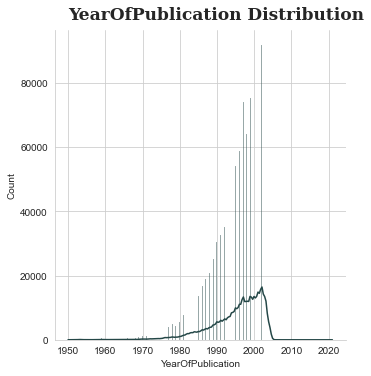

In [61]:
plot_distribution('YearOfPublication', df)

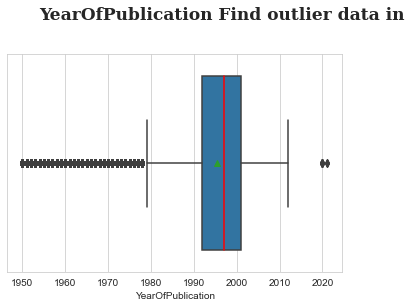

In [62]:
plot_box('YearOfPublication', df)
#red: meadian
#green:mean

In [63]:
df['YearOfPublication'].value_counts()

2002.0    91800
2001.0    79801
1999.0    75194
1997.0    74151
2003.0    72539
          ...  
2010.0        4
2006.0        3
2021.0        3
2012.0        1
2008.0        1
Name: YearOfPublication, Length: 63, dtype: int64

#### 3-1-4- Other features

In [64]:
#df['BookAuthor'] = df['BookAuthor'].apply(lambda x: x.lower().title())

In [65]:
# Replace ampersands and capitalize book titles
df['BookTitle'] = df['BookTitle'].str.replace('&amp;', 'and')#.apply(lambda x: x.lower().title())

In [66]:
df['BookTitle'].head() 

0                                  Classical Mythology
1                                         Clara Callan
2                                 Decision in Normandy
3    Flu: The Story of the Great Influenza Pandemic...
4                               The Mummies of Urumchi
Name: BookTitle, dtype: object

In [67]:
df['Publisher'].head()

0       Oxford University Press
1         HarperFlamingo Canada
2               HarperPerennial
3          Farrar Straus Giroux
4    W. W. Norton &amp; Company
Name: Publisher, dtype: object

In [68]:
df['Publisher'] = df['Publisher'].str.replace('&amp;', 'and')#.apply(lambda x: x.lower().title())

In [69]:
df['Publisher'].head()

0     Oxford University Press
1       HarperFlamingo Canada
2             HarperPerennial
3        Farrar Straus Giroux
4    W. W. Norton and Company
Name: Publisher, dtype: object

In [70]:
df.isnull().sum().sort_values(ascending=False)

Publisher            2
BookAuthor           1
BookID               0
BookTitle            0
YearOfPublication    0
UserID               0
BookRating           0
Age                  0
Age_group            0
Country              0
dtype: int64

In [71]:
df.Publisher.fillna('other', inplace=True)

In [72]:
df.BookAuthor.fillna('other', inplace=True)

In [73]:
df.isnull().sum().sort_values(ascending=False)

BookID               0
BookTitle            0
BookAuthor           0
YearOfPublication    0
Publisher            0
UserID               0
BookRating           0
Age                  0
Age_group            0
Country              0
dtype: int64

#### Exploring variable's correlation

<AxesSubplot:title={'center':'Correlation Heatmap'}>

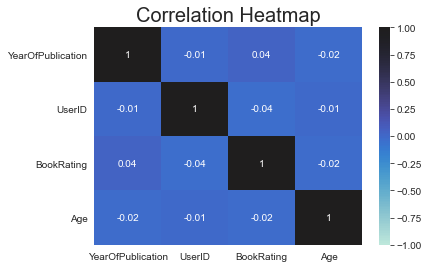

In [74]:
corr_df = df.corr().round(2) 

plt.title('Correlation Heatmap', size=20)
sns.heatmap(corr_df,vmin=-1, vmax=1,annot=True,center=True)
#Maybe there isn't any correlation between numerical features.

In [75]:
#corrolation between numerical and categorical features
#pip3 install dython

In [76]:
#from dython import nominal
#nominal.associations(df,figsize=(20,10),mark_columns=True);

##### 3.2- Visualizing

In [77]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = df[df['BookRating'] != 0]
ratings_implicit = df[df['BookRating'] == 0]

ratings numbers: (1031136,)
explicit rating numbers: (383842, 10)
implicit rating numbers: (647294, 10)


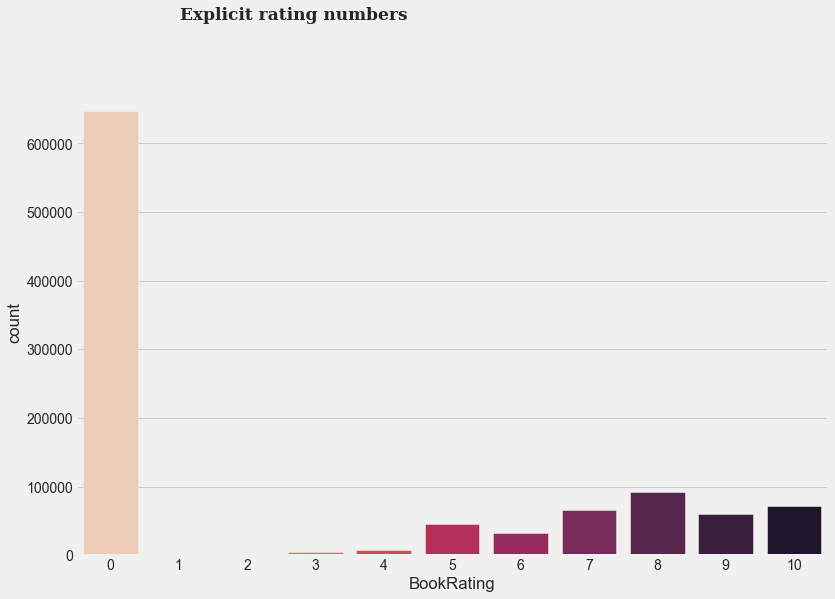

In [78]:
print("ratings numbers:",df.BookRating.shape)
print("explicit rating numbers:",ratings_explicit.shape)
print("implicit rating numbers:",ratings_implicit.shape)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=df , x='BookRating', palette='rocket_r')
plt.figtext(0.2, 1, 'Explicit rating numbers', fontfamily='serif', fontsize=17, fontweight='bold');

115 countries


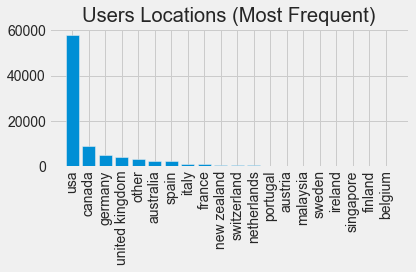

In [79]:
# Users by country
print(f'{df["Country"].nunique()} countries')
counts = df.drop_duplicates(subset=['UserID'])['Country'].value_counts().nlargest(20)
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.title(f'Users Locations (Most Frequent)')
plt.tight_layout()
plt.show()

84 Ages


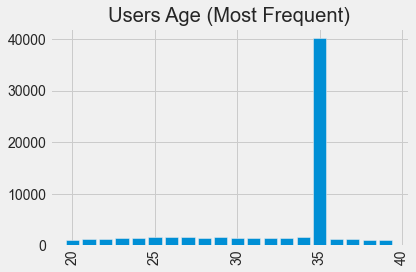

In [80]:
# Users by Age
print(f'{df["Age"].nunique()} Ages')
counts = df.drop_duplicates(subset=['UserID'])['Age'].value_counts().nlargest(20)
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.title(f'Users Age (Most Frequent)')
plt.tight_layout()
plt.show()

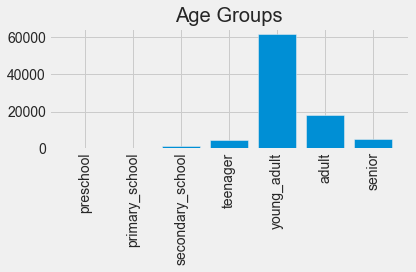

In [81]:
# Users by age-group
counts = df.drop_duplicates(subset=['UserID'])['Age_group'].value_counts()
groups = ['preschool', 'primary_school', 'secondary_school',
          'teenager', 'young_adult', 'adult', 'senior']
plt.bar(groups, counts[groups].values)
plt.xticks(rotation=90)
plt.title(f'Age Groups')
plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------------------
BookID: 270151 unique values


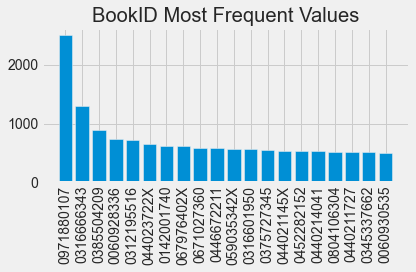

Top-20 most frequent values:
0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0142001740     615
067976402X     614
0671027360     586
0446672211     585
059035342X     571
0316601950     568
0375727345     552
044021145X     529
0452282152     526
0440214041     523
0804106304     519
0440211727     517
0345337662     506
0060930535     494
Name: BookID, dtype: int64
----------------------------------------------------------------------------------------------------
BookAuthor: 101587 unique values


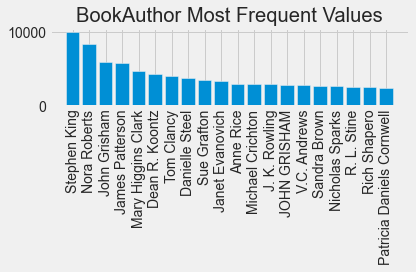

Top-20 most frequent values:
Stephen King                 10053
Nora Roberts                  8429
John Grisham                  6010
James Patterson               5845
Mary Higgins Clark            4777
Dean R. Koontz                4313
Tom Clancy                    4036
Danielle Steel                3726
Sue Grafton                   3457
Janet Evanovich               3350
Anne Rice                     3030
Michael Crichton              2921
J. K. Rowling                 2908
JOHN GRISHAM                  2808
V.C. Andrews                  2785
Sandra Brown                  2663
Nicholas Sparks               2650
R. L. Stine                   2606
Rich Shapero                  2502
Patricia Daniels Cornwell     2461
Name: BookAuthor, dtype: int64
----------------------------------------------------------------------------------------------------
Publisher: 16682 unique values


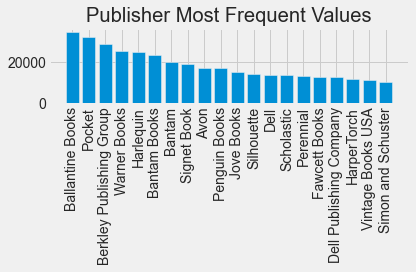

Top-20 most frequent values:
Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25027
Bantam Books                23598
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Jove Books                  15178
Silhouette                  14184
Dell                        13916
Scholastic                  13662
Perennial                   13466
Fawcett Books               12905
Dell Publishing Company     12733
HarperTorch                 12081
Vintage Books USA           11426
Simon and Schuster          10389
Name: Publisher, dtype: int64
----------------------------------------------------------------------------------------------------
BookTitle: 240953 unique values


<ipython-input-82-a935fb49e3d7>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


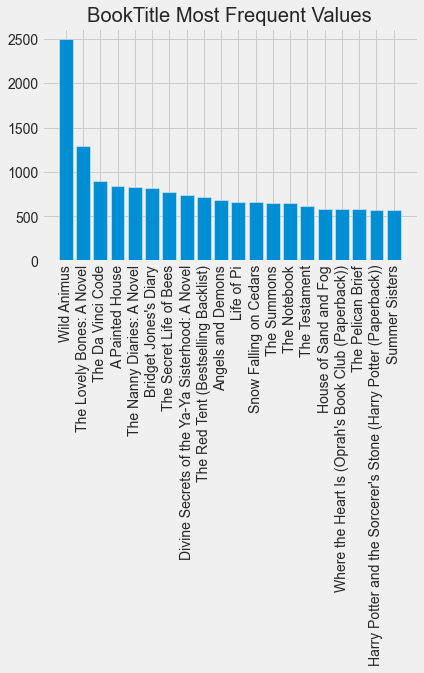

Top-20 most frequent values:
Wild Animus                                                         2502
The Lovely Bones: A Novel                                           1295
The Da Vinci Code                                                    898
A Painted House                                                      838
The Nanny Diaries: A Novel                                           828
Bridget Jones's Diary                                                815
The Secret Life of Bees                                              774
Divine Secrets of the Ya-Ya Sisterhood: A Novel                      740
The Red Tent (Bestselling Backlist)                                  723
Angels and Demons                                                    690
Life of Pi                                                           664
Snow Falling on Cedars                                               662
The Summons                                                          655
The Notebook          

In [82]:
# Content analysis
for column in ('BookID', 'BookAuthor', 'Publisher', 'BookTitle'):
    print('-' * 100)
    print(f'{column}: {df[column].nunique()} unique values')
    counts = df[column].value_counts().nlargest(20)
    plt.bar(counts.index, counts.values)
    plt.xticks(rotation=90)
    plt.title(f'{column} Most Frequent Values')
    plt.tight_layout()
    plt.show()
    print('Top-20 most frequent values:')
    print(counts)

In [83]:
# 10 Top of booktitle which have maximum rating count
r= pd.DataFrame(df.groupby("BookTitle").count()["BookRating"])
r.sort_values(by="BookRating",ascending = False).head(10)

,BookRating
BookTitle,
Wild Animus,2502
The Lovely Bones: A Novel,1295
The Da Vinci Code,898
A Painted House,838
The Nanny Diaries: A Novel,828
Bridget Jones's Diary,815
The Secret Life of Bees,774
Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
The Red Tent (Bestselling Backlist),723


In [84]:
# 10 Top of users who have maximum rating count
r= pd.DataFrame(df.groupby("UserID").count()["BookRating"])
r.sort_values(by="BookRating",ascending = False).head(10)

,BookRating
UserID,
11676,11144
198711,6456
153662,5814
98391,5779
35859,5646
212898,4289
278418,3996
76352,3329
110973,2971


In [85]:
#Make book-rating matrix
df11=df.head(20)#because of memory limitation, should reduse df

In [86]:
book_matrix = df11.pivot_table(index="UserID", columns="BookTitle", values="BookRating").head(10)

In [87]:
book_matrix

BookTitle,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),Clara Callan,Classical Mythology,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Goodbye to the Buttermilk Sky,Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust,Jane Doe,More Cunning Than Man: A Social History of Rats and Man,Nights Below Station Street,PLEADING GUILTY,The Five People You Meet in Heaven,The Kitchen God's Wife,The Middle Stories,The Mummies of Urumchi,The Witchfinder (Amos Walker Mystery Series),Under the Black Flag: The Romance and the Reality of Life Among the Pirates,What If?: The World's Foremost Military Historians Imagine What Might Have Been,Where You'll Find Me: And Other Stories
UserID,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,5.0,NaN,0.0,0.0,7.0,0.0,5.0,6.0,0.0,0.0,NaN,0.0,5.0,0.0,6.0,0.0,0.0,5.0
11400,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#Finding publisher which have the most book count
my_dict=(df['Publisher'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
count.head(10)

,c,count
0,Ballantine Books,34724
1,Pocket,31989
2,Berkley Publishing Group,28614
3,Warner Books,25506
4,Harlequin,25027
5,Bantam Books,23598
6,Bantam,20007
7,Signet Book,19155
8,Avon,17352
9,Penguin Books,17033


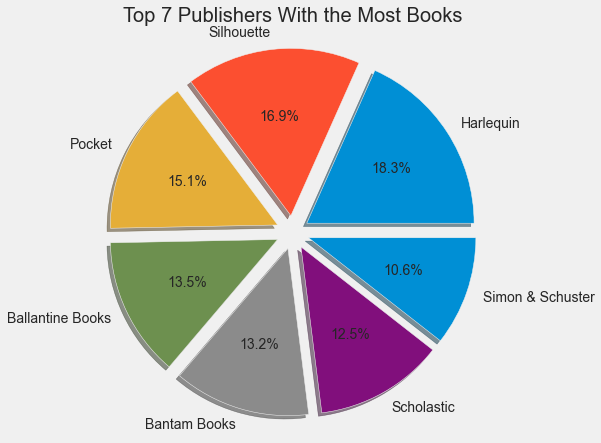

In [89]:
my_dict=(df['Publisher'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'Harlequin','Silhouette','Pocket','Ballantine Books','Bantam Books','Scholastic','Simon & Schuster'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4],
         count['count'].iloc[5],count['count'].iloc[6]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )
fig1 , ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Publishers With the Most Books")
ax1.axis ('equal')
plt.show()

In [90]:
# Pie chart showing countries with most number of users 
my_dict=(df['BookRating'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(10)
#c is rating value

,c,count
0,0,647294
1,8,91804
2,10,71225
3,7,66402
4,9,60778
5,5,45355
6,6,31687
7,4,7617
8,3,5118
9,2,2375


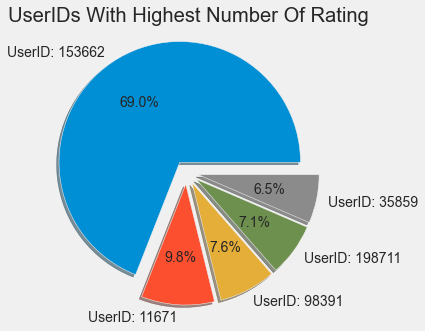

In [91]:
# Pie chart showing countries with most number of users 
my_dict=(df['BookRating'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'UserID: 153662','UserID: 11671','UserID: 98391','UserID: 198711','UserID: 35859'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1,0.1)

fig1 , ax1 = plt.subplots(figsize=(5,5))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("UserIDs With Highest Number Of Rating")
ax1.axis ('equal')

plt.show()

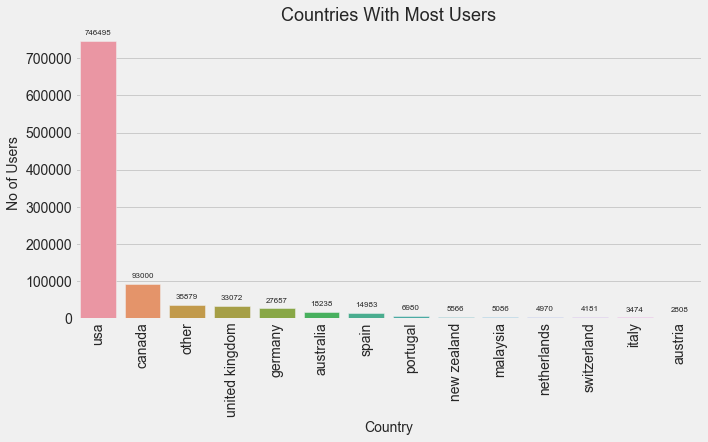

In [92]:
my_dict=(df['Country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
f.drop(7,inplace=True)
fig=plt.figure(figsize=(10,5))
ax = sns.barplot(y = 'count',x= 'c' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 
plt.xlabel("Country", size=14)
plt.ylabel("No of Users", size=14)
plt.title("Countries With Most Users", size=18)
plt.show()

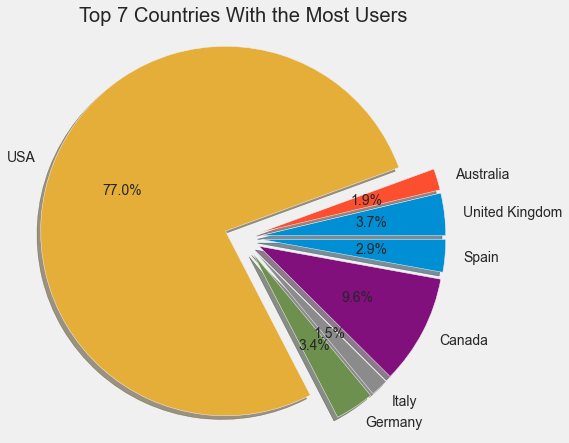

In [93]:
# Pie chart showing countries with most number of users 
my_dict=(df['Country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'United Kingdom','Australia','USA','Germany','Italy','Canada','Spain'
sizes = [count['count'].iloc[2],count['count'].iloc[5],count['count'].iloc[0],count['count'].iloc[3],count['count'].iloc[6],
         count['count'].iloc[1],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )

fig1 , ax1 = plt.subplots(figsize=(7,7))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Countries With the Most Users")
ax1.axis ('equal')

plt.show()

### Make rating dataset

In [94]:
df.columns

Index(['BookID', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher',
       'UserID', 'BookRating', 'Age', 'Age_group', 'Country'],
      dtype='object')

In [95]:
ratings_data=df[['BookID','UserID','BookRating']]

### Make book metadata dataset

In [96]:
books_metadata=df[['BookID', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher']]    

### Make book metadata dataset

In [97]:
users_metadata= [['UserID','Age', 'Country']]